In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('kaggle-survey-2018/multipleChoiceResponses.csv')
questions = data.iloc[:1]
data1 = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


POPULATION OF THE COUNTRIES

In [49]:
pop_data = pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv").iloc[2624:]

In [50]:
pop2016condition = pop_data['Year'] == 2016
pop_data = pop_data[pop2016condition]

In [74]:
pop_data['Country Name'] = pop_data['Country Name'].replace('United States', 'United States of America')
pop_data['Country Name'] = pop_data['Country Name'].replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
pop_data['Country Name'] = pop_data['Country Name'].replace('Iran, Islamic Rep.', 'Iran, Islamic Republic of...')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Dem. People's Rep.", 'Republic of Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Rep.", 'South Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Hong Kong SAR, China", "Hong Kong (S.A.R.)")

In [102]:
participation = Counter(data1['Q3'])

pop_data['new_index'] = range(len(pop_data)) #orders the list
pop_data = pop_data.set_index('new_index')
populations = {}
for l in range(len(pop_data['Country Name'])):
    populations[pop_data['Country Name'][l]] = pop_data['Value'][l]

porc_data = {}
for i in pop_data['Country Name']:
    if i in Counter(data1['Q3']):
        porc_data[i] = (participation[i]/populations[i])*100

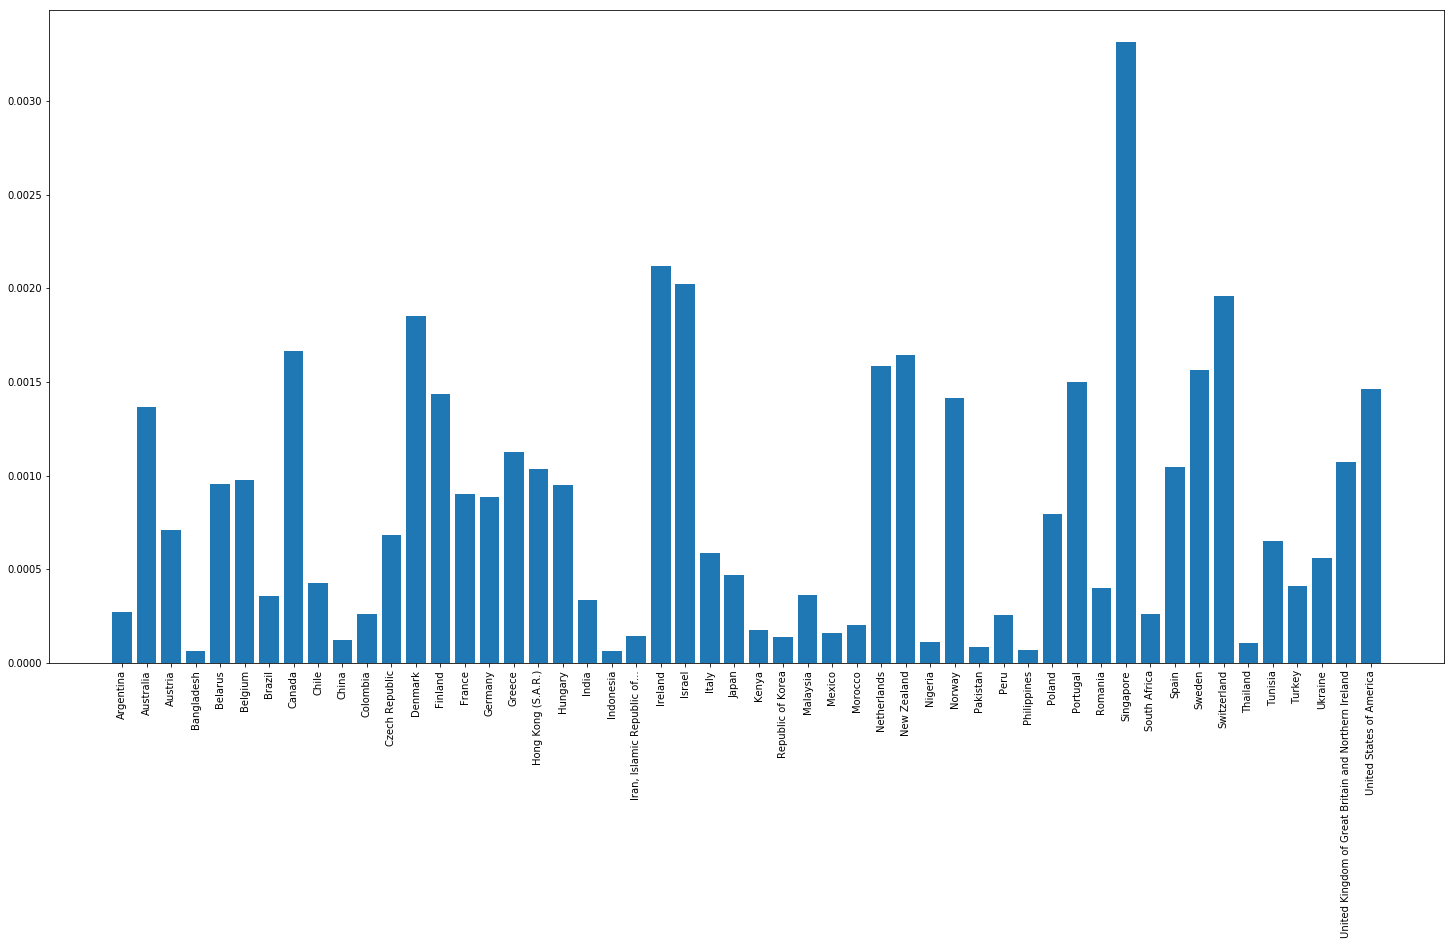

In [103]:
plt.figure(figsize=(25,12))
plt.bar(porc_data.keys(),porc_data.values())
plt.xticks(rotation=90)
plt.show()

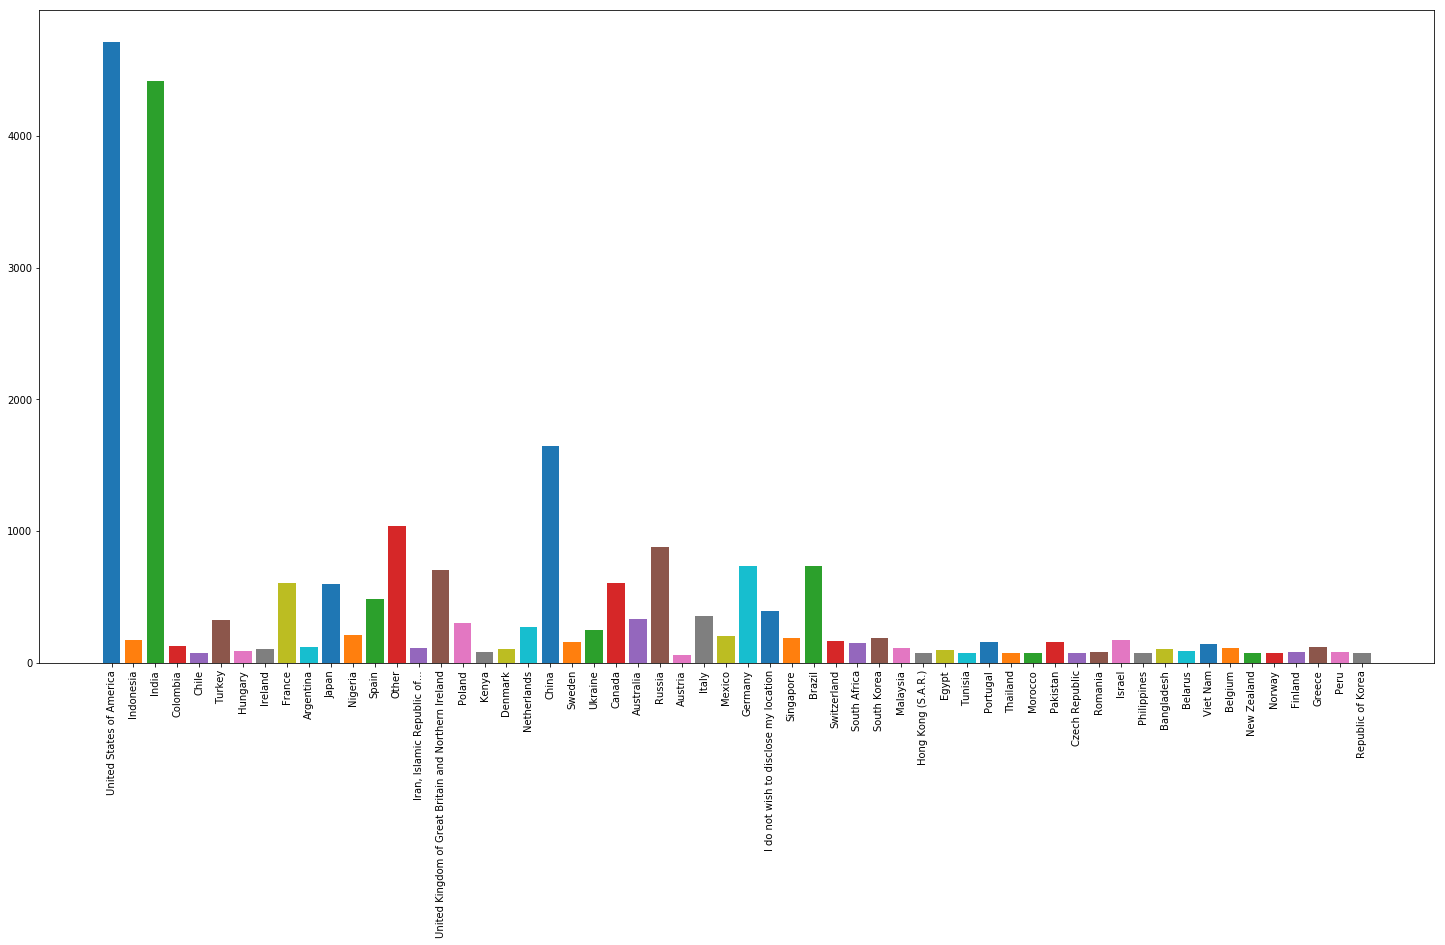

In [84]:
plt.figure(figsize=(25,12))
for i in Counter(data1["Q3"]):
    plt.bar(i,Counter(data1["Q3"])[i])
plt.xticks(rotation=90)
plt.show()

In [75]:
for i in pop_data['Country Name']:
    if i in Counter(data1['Q3']):
        print(i)

Argentina
Australia
Austria
Bangladesh
Belarus
Belgium
Brazil
Canada
Chile
China
Colombia
Czech Republic
Denmark
Finland
France
Germany
Greece
Hong Kong (S.A.R.)
Hungary
India
Indonesia
Iran, Islamic Republic of...
Ireland
Israel
Italy
Japan
Kenya
Republic of Korea
Malaysia
Mexico
Morocco
Netherlands
New Zealand
Nigeria
Norway
Pakistan
Peru
Philippines
Poland
Portugal
Romania
Singapore
South Africa
Spain
Sweden
Switzerland
Thailand
Tunisia
Turkey
Ukraine
United Kingdom of Great Britain and Northern Ireland
United States of America


In [62]:
Counter(data1['Q3'])

Counter({'United States of America': 4716,
         'Indonesia': 171,
         'India': 4417,
         'Colombia': 128,
         'Chile': 76,
         'Turkey': 327,
         'Hungary': 93,
         'Ireland': 101,
         'France': 604,
         'Argentina': 119,
         'Japan': 597,
         'Nigeria': 208,
         'Spain': 485,
         'Other': 1036,
         'Iran, Islamic Republic of...': 113,
         'United Kingdom of Great Britain and Northern Ireland': 702,
         'Poland': 301,
         'Kenya': 85,
         'Denmark': 106,
         'Netherlands': 270,
         'China': 1644,
         'Sweden': 155,
         'Ukraine': 252,
         'Canada': 604,
         'Australia': 330,
         'Russia': 879,
         'Austria': 62,
         'Italy': 355,
         'Mexico': 202,
         'Germany': 734,
         'I do not wish to disclose my location': 394,
         'Singapore': 186,
         'Brazil': 736,
         'Switzerland': 164,
         'South Africa': 147,
         'Sout

In [89]:
a=Counter(data1['Q3'])
Pop={}

In [90]:
a

Counter({'United States of America': 4716,
         'Indonesia': 171,
         'India': 4417,
         'Colombia': 128,
         'Chile': 76,
         'Turkey': 327,
         'Hungary': 93,
         'Ireland': 101,
         'France': 604,
         'Argentina': 119,
         'Japan': 597,
         'Nigeria': 208,
         'Spain': 485,
         'Other': 1036,
         'Iran, Islamic Republic of...': 113,
         'United Kingdom of Great Britain and Northern Ireland': 702,
         'Poland': 301,
         'Kenya': 85,
         'Denmark': 106,
         'Netherlands': 270,
         'China': 1644,
         'Sweden': 155,
         'Ukraine': 252,
         'Canada': 604,
         'Australia': 330,
         'Russia': 879,
         'Austria': 62,
         'Italy': 355,
         'Mexico': 202,
         'Germany': 734,
         'I do not wish to disclose my location': 394,
         'Singapore': 186,
         'Brazil': 736,
         'Switzerland': 164,
         'South Africa': 147,
         'Sout